In [1]:
csv = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

pd.set_option('display.max_columns', 70)

In [3]:
df = pd.read_csv(csv)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)


Predict variable (desired target) y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
col_y = df.y
df.drop(['y'], axis=1, inplace=True)
df.insert(0, 'y', col_y)
df.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,0,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,1,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,0,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,1,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2


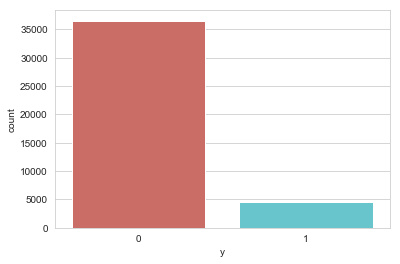

In [9]:
sns.countplot(x='y', data=df, palette='hls')

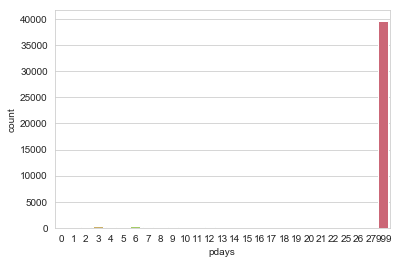

In [10]:
sns.countplot(x='pdays', data=df, palette='hls')

In [11]:
df.pdays.unique()

array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27])

In [12]:
df.pdays.replace(999, 0, inplace=True)

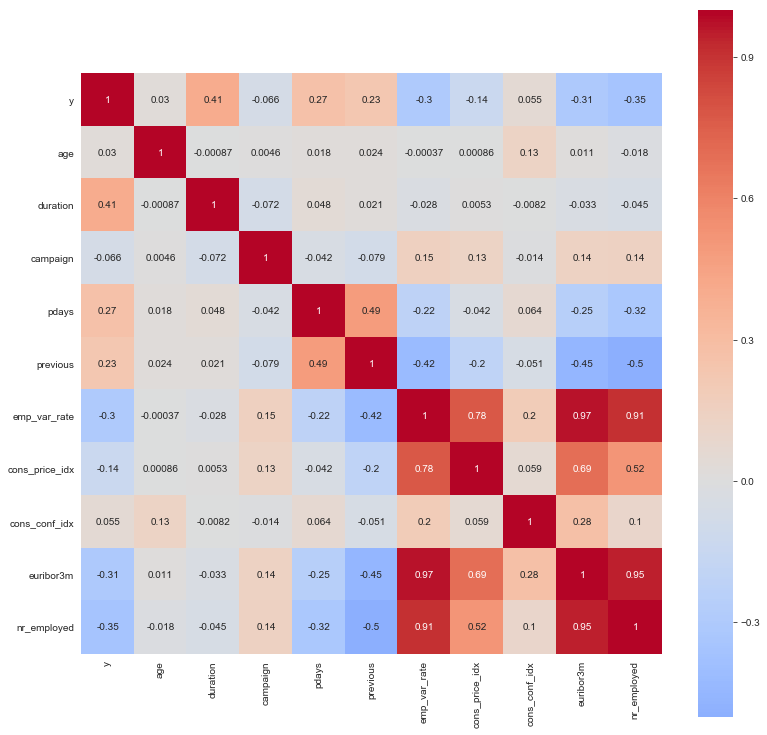

In [13]:
corr = df.corr()
f, ax = plt.subplots(figsize = (13,13))
sns.heatmap(data = corr, center = 0, cmap="coolwarm", annot=True, square=True)

In [14]:
df.drop(['emp_var_rate', 'cons_price_idx', 'euribor3m', 'pdays', 'age', 'campaign', 'cons_conf_idx'], axis=1, inplace=True)

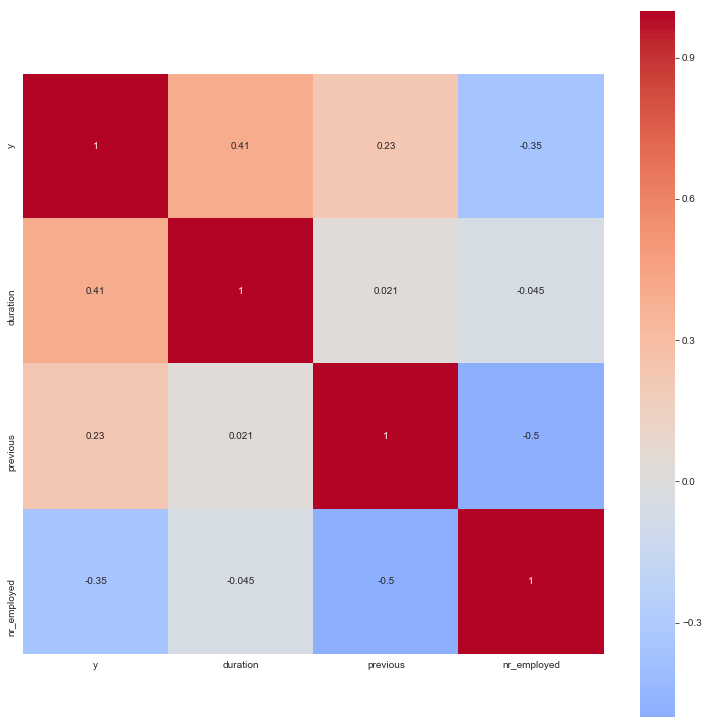

In [15]:
corr = df.corr()
f, ax = plt.subplots(figsize = (13,13))
sns.heatmap(data = corr, center = 0, cmap="coolwarm", annot=True, square=True)

In [16]:
df2 = df.copy()

In [17]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [18]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [19]:
df.default.unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [20]:
df.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [21]:
df.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [22]:
job = pd.get_dummies(df['job'], prefix='job', drop_first=True)
marital = pd.get_dummies(df['marital'], prefix='mari', drop_first=True)
education = pd.get_dummies(df['education'], prefix='edu', drop_first=True)
default = pd.get_dummies(df['default'], prefix='default', drop_first=True)
housing = pd.get_dummies(df['housing'], prefix='housing', drop_first=True)
loan = pd.get_dummies(df['loan'], prefix='loan', drop_first=True)
contact = pd.get_dummies(df['contact'], prefix='cont', drop_first=True)
month = pd.get_dummies(df['month'], prefix='month', drop_first=True)
day = pd.get_dummies(df['day_of_week'], prefix='day', drop_first=True)
p_out = pd.get_dummies(df['poutcome'], prefix='p_out', drop_first=True)
df2 = pd.concat([df2, job, marital, education, default, housing, loan, contact, month, day, p_out], axis=1)
df2.head()

,y,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,poutcome,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,mari_married,mari_single,mari_unknown,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,cont_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_thu,day_tue,day_wed,p_out_nonexistent,p_out_success
0,0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,0,nonexistent,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,technician,married,unknown,no,no,no,cellular,nov,fri,138,0,nonexistent,5195.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,management,single,university.degree,no,yes,no,cellular,jun,thu,339,2,success,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0,services,married,high.school,no,no,no,cellular,apr,fri,185,0,nonexistent,5099.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,success,5076.2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
df2.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1, inplace=True)
df2.head()

,y,duration,previous,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,mari_married,mari_single,mari_unknown,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,cont_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_thu,day_tue,day_wed,p_out_nonexistent,p_out_success
0,0,210,0,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,138,0,5195.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,339,2,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0,185,0,5099.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,137,1,5076.2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


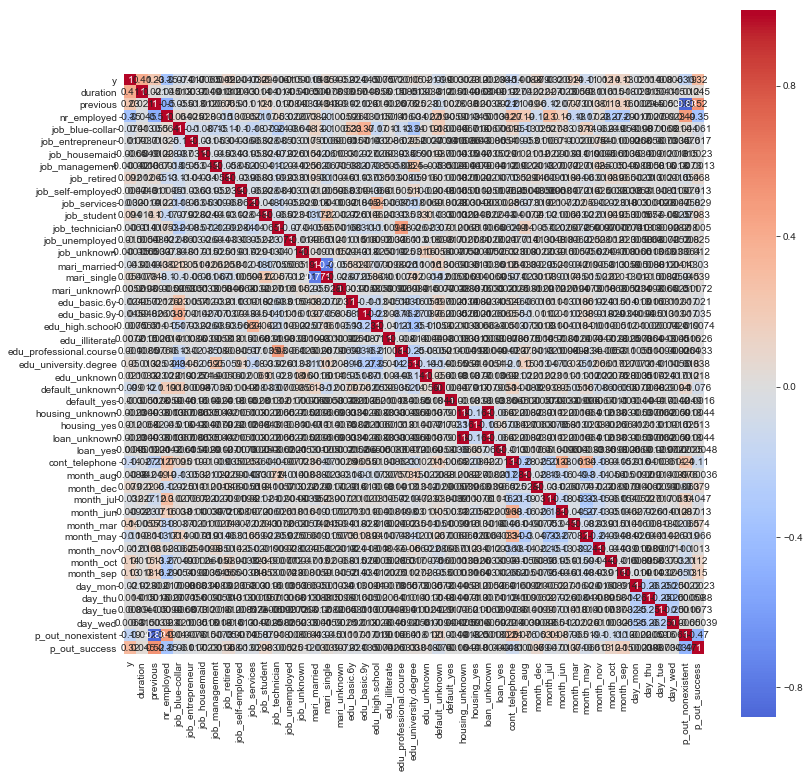

In [24]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (13,13))
sns.heatmap(data = corr, center = 0, cmap="coolwarm", annot=True, square=True)

In [33]:
X = df2.iloc[:,2:].values
y = df2.y.values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = LogReg.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7282,   43],
       [ 807,  106]])

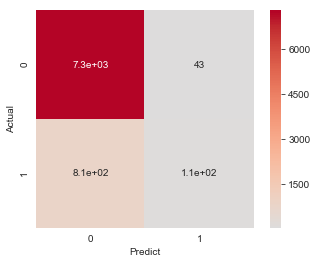

In [38]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predict'])
sns.heatmap(data=confusion_matrix, center = 0, cmap="coolwarm", annot=True, square=True)

In [39]:
print('Test Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score:  0.8968196164117505


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7325
           1       0.71      0.12      0.20       913

    accuracy                           0.90      8238
   macro avg       0.81      0.56      0.57      8238
weighted avg       0.88      0.90      0.86      8238

